HELLO WORLD

In [75]:
%%capture
%pip install scipy matplotlib


In [76]:
from scipy.io import wavfile
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

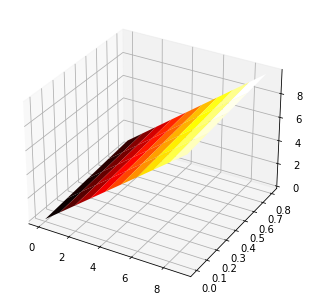

In [77]:
x = np.arange(0,10,1)
y = np.arange(0,1,0.2)

xs, ys = np.meshgrid(x, y)
# z = calculate_R(xs, ys)
zs = xs + ys

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, cmap='hot')
plt.show()

In [78]:

sample_rate, data = wavfile.read('sounds/BreakingGlass.wav')
print(f"number of samples = {data.shape[0]}")
data

number of samples = 20032


array([134, 134, 134, ..., 134, 128, 128], dtype=uint8)

In [79]:
length = data.shape[0] / sample_rate
print(f'sample len: {length}s')

sample len: 0.9084807256235827s


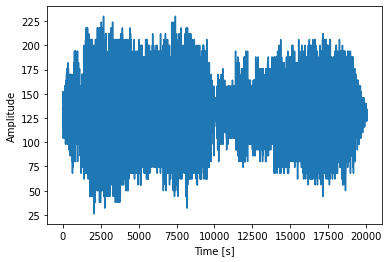

In [80]:
pl.xlabel("Time [s]")
pl.ylabel("Amplitude")
pl.plot(data)

In [81]:
p = 20*np.log10(np.abs(np.fft.rfft(data[0:2048])))
f = np.linspace(0, sample_rate/2.0, len(p))


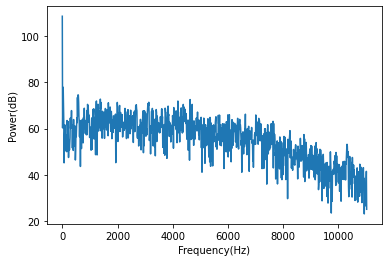

In [82]:
pl.xlabel("Frequency(Hz)")
pl.ylabel("Power(dB)")
pl.plot(f, p)

In [85]:
full_fft_data = [20*np.log10(np.abs(np.fft.rfft(data[start_range:start_range + 2048])))
  for start_range in range(0, data.shape[0], 2048)]

full_fft_data

<ipython-input-85-2cf8cc7df48b>:1: RuntimeWarning:

divide by zero encountered in log10



[array([108.61098201,  60.31903304,  70.38626719, ...,  36.68170626,
         41.51367167,  25.1054501 ]),
 array([108.63087757,  60.41553499,  51.86520981, ...,  45.65117264,
         36.96131806,  27.60422483]),
 array([108.59724101,  46.88180926,  60.10829552, ...,  27.89572373,
         42.81194863,  33.62482475]),
 array([108.60150111,  53.89332096,  63.48070798, ...,  40.22580649,
         37.47566147,         -inf]),
 array([108.60208187,  49.91041783,  59.14764558, ...,  34.03435881,
         36.9942959 ,  41.13809703]),
 array([108.64244625,  61.58731982,  68.0116769 , ...,  36.61920878,
         35.34745371,  39.64542466]),
 array([108.59704732,  54.14559258,  51.47892619, ...,  35.69154204,
         26.29192866,  32.46498581]),
 array([108.6117555 ,  41.93537261,  64.17175192, ...,  20.0537639 ,
         42.15105408,  37.84189205]),
 array([108.61078863,  44.75715339,  61.92313184, ...,  39.78654799,
         34.78749824,  37.14664993]),
 array([106.39993294,  61.33485272,  